## **Fake news detection ML model**


In [31]:
# importing the necessary packages
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy


Reading the dataset


In [32]:
data = pd.read_csv('/kaggle/input/ifnd-dataset/IFND.csv', encoding="ISO-8859-1")
data


,id,Statement,Image,Web,Category,Date,Label
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,TRUE
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,TRUE
...,...,...,...,...,...,...,...
56709,56711,Fact Check: This is not Bruce Lee playing ping...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,MISLEADING,11-2019,Fake
56710,56712,Fact Check: Did Japan construct this bridge in...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,COVID-19,10-2019,Fake
56711,56713,Fact Check: Viral video of Mexico earthquake i...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,MISLEADING,10-2019,Fake
56712,56714,Fact Check: Ballet performance by Chinese coup...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,COVID-19,9-2019,Fake


In [33]:
data.shape


(56714, 7)

In [34]:
data.isnull().sum()


id               0
Statement        0
Image            0
Web              0
Category         0
Date         11321
Label            0
dtype: int64

In [35]:
data = data.drop(columns=['id', 'Image', 'Date'])


DATA PROCESSING :

1.  Make text lowercase
2.  Remove punctuation
3.  Remove emoji’s
4.  Remove stopwords
5.  Lemmatization


In [36]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])


In [37]:
############## Converting statements into lowercase ##############
########## To remove punctuation #######
data['new_Statement'] = data['Statement'].apply(lambda x: " ".join(
    x.lower() for x in x.split())).str.replace('[^\w\s]', '')
data['new_Statement'].shape


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


(56714,)

In [38]:
################## REMOVING EMOJIS####################
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


data['new_Statement'] = data['new_Statement'].apply(lambda x: remove_emoji(x))
data['new_Statement']


0        who praises indias aarogya setu app says it he...
1        in delhi deputy us secretary of state stephen ...
2        lac tensions chinas strategy behind deliberate...
3        india has signed 250 documents on space cooper...
4        tamil nadu chief ministers mother passes away ...
                               ...                        
56709    fact check this is not bruce lee playing pingp...
56710    fact check did japan construct this bridge in ...
56711    fact check viral video of mexico earthquake is...
56712    fact check ballet performance by chinese coupl...
56713    fact check is this little boy crossing into jo...
Name: new_Statement, Length: 56714, dtype: object

In [39]:
################### REMOVING STOP WORDS###################
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
data['new_Statement'] = data['new_Statement'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop))
data['new_Statement'].shape


[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


(56714,)

In [40]:
############### lemmatization using Spacy so that we can count the appearance of each word. Lemmatization removes the grammar tense and transforms each word into its original form. #######
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])


data['new_Statement'] = data['new_Statement'].apply(space)
data['new_Statement'].head(30)


0     praise indias aarogya setu app say help identi...
1     delhi deputy us secretary state stephen biegun...
2     lac tension china strategy behind deliberately...
3     india sign 250 document space cooperation 59 c...
4         tamil nadu chief minister mother pass away 93
5     bihar assembly election 2020 tej pratap shift ...
6     hathras case cbi reach victim village visit cr...
7     rajasthan crime news karauli another elderly b...
8     mumbai bmc book penalise people step without f...
9     covid19 indias singleday spike drop 55342 tall...
10    amid stubble burn delhis air quality deteriora...
11    bihar assembly election bjp expel nine rebel c...
12    pm modi release balasaheb vikhe patil autobiog...
13    post office recruitment 2020 big vacancy 1371 ...
14             mumbai power outage fire report hospital
15    tamil nadu covid recovery touch sixlakh mark a...
16    indian export armenia increase threefold past ...
17          7 indian hostage free libya good hea

In [41]:
# Define the words to remove
words_to_remove = ['fact', 'check', 'know']

# Replace the words with an empty string
data['new_Statement'] = data['new_Statement'].apply(lambda x: ' '.join(
    [word for word in x.lower().split() if word not in words_to_remove]))


In [42]:
from sklearn.model_selection import train_test_split as tts
X = data[['new_Statement', 'Category']].values
y = data['Label'].values
X_train, X_test, Y_train, Y_test = tts(X, y, test_size=0.3)
#print(Y_train)
#print(Y_test)
# print(Y_train.groupby('Label').count())
# print(Y_test.groupby(level = 0 ).count())
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(39699, 2) (39699,)
(17015, 2) (17015,)


In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split as tts
# Preprocess the text data


def preprocess(text):
    # TODO: Add your preprocessing steps here
    return text


data['new_Statement'] = data['new_Statement'].apply(preprocess)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = tts(
    data['new_Statement'], data['Label'], test_size=0.3, random_state=42)

# Bag-of-words feature extraction
count_vectorizer = CountVectorizer(stop_words='english')
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Tfidf feature extraction
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print the shape of the feature matrices
#print(X_train_count, X_test_count, Y_train, Y_test)
print('CountVectorizer:', X_train_count.shape, X_test_count.shape)
print('TfidfVectorizer:', X_train_tfidf.shape, X_test_tfidf.shape)


CountVectorizer: (39699, 30980) (17015, 30980)
TfidfVectorizer: (39699, 30980) (17015, 30980)


In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_count, Y_train)

# Predict the labels of the test set
Y_pred_lr = lr.predict(X_test_count)

# Calculate the evaluation metrics
print('Accuracy:', accuracy_score(Y_test, Y_pred_lr))
print('Precision:', precision_score(Y_test, Y_pred_lr, pos_label='Fake'))
# print('Recall:', recall_score(Y_test, Y_pred_lr, pos_label='TRUE'))
print('F1-score:', f1_score(Y_test, Y_pred_lr, pos_label='Fake'))


Accuracy: 0.913429327064355
Precision: 0.917691392304641
F1-score: 0.8626829495665144


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
lr_model = LogisticRegression(
    class_weight='balanced', penalty='l2', max_iter=1000)

# Fit the model to the training data
lr_model.fit(X_train_tfidf, Y_train)

# Predict the labels of the test data
Y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate the performance of the model

print('Accuracy:', accuracy_score(Y_test, Y_pred_lr))
print('Precision:', precision_score(Y_test, Y_pred_lr, pos_label='Fake'))
print('Precision:', precision_score(Y_test, Y_pred_lr, pos_label='TRUE'))
print('Recall:', recall_score(Y_test, Y_pred_lr, pos_label='Fake'))
print('Recall:', recall_score(Y_test, Y_pred_lr, pos_label='TRUE'))
print('F1-score:', f1_score(Y_test, Y_pred_lr, pos_label='Fake'))
print('F1-score:', f1_score(Y_test, Y_pred_lr, pos_label='TRUE'))


Accuracy: 0.9101968851013811
Precision: 0.8901820912333396
Precision: 0.9193189596167008
Recall: 0.8341248900615655
Recall: 0.9483671668137688
F1-score: 0.8612422811478386
F1-score: 0.9336171691719524


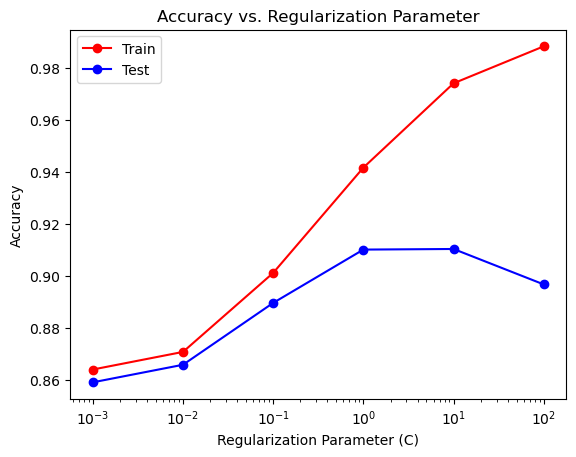

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
# lr_model = LogisticRegression(class_weight='balanced', max_iter=1000,penalty='l2')

# Create lists to store train and test accuracy
train_acc = []
test_acc = []

# Train the model for different values of C
for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    # Set the regularization parameter
    lr_model.set_params(C=c)

    # Fit the model to the training data
    lr_model.fit(X_train_tfidf, Y_train)

    # Predict the labels of the train and test data
    Y_pred_train = lr_model.predict(X_train_tfidf)
    Y_pred_test = lr_model.predict(X_test_tfidf)

    # Compute the accuracy of the model
    train_accuracy = accuracy_score(Y_train, Y_pred_train)
    test_accuracy = accuracy_score(Y_test, Y_pred_test)

    # Append the accuracies to the lists
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

# Plot the accuracy graph
plt.plot([0.001, 0.01, 0.1, 1, 10, 100], train_acc, 'ro-', label='Train')
plt.plot([0.001, 0.01, 0.1, 1, 10, 100], test_acc, 'bo-', label='Test')
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Regularization Parameter')
plt.legend()
plt.show()


In [47]:
new_data = ["This news is completely fake"]
new_data_tfidf = tfidf_vectorizer.transform(new_data)
predicted_label = lr_model.predict(new_data_tfidf)
print(predicted_label)


['Fake']


In [48]:
new_data = [
    "WHO praises India's Aarogya Setu app, says it helped in identifying COVID-19 clusters"]
new_data_tfidf = tfidf_vectorizer.transform(new_data)
predicted_label = lr_model.predict(new_data_tfidf)
print(predicted_label)


['TRUE']


In [49]:
new_data = ["Fictitious Anil Upadhyay Is Back, This Time As BJP MLA Against CAA"]
new_data_tfidf = tfidf_vectorizer.transform(new_data)
predicted_label = lr_model.predict(new_data_tfidf)
print(predicted_label)


['Fake']


In [50]:
new_data = ["Flagging a dubious claim: Flags hoisted atop houses in Jalandhar have no Pakistan link.Fact Check: This is not an RSS man held for waving Pakistani flag in burqa"]
new_data_tfidf = tfidf_vectorizer.transform(new_data)
predicted_label = lr_model.predict(new_data_tfidf)
print(predicted_label)


['Fake']


In [51]:
new_data = ["Has 4G internet Service been restored in Jammu and Kashmir? Know the truth :.Fact Check: Old image from Kashmir linked to Delhi violence"]
new_data_tfidf = tfidf_vectorizer.transform(new_data)
predicted_label = lr_model.predict(new_data_tfidf)
print(predicted_label)


['Fake']


In [52]:
new_data = ["Salman Khan is Dead"]
new_data_tfidf = tfidf_vectorizer.transform(new_data)
predicted_label = lr_model.predict(new_data_tfidf)
print(predicted_label)


['Fake']


In [53]:
new_data = ["Sushant Singh Rajput is Dead"]
new_data_tfidf = tfidf_vectorizer.transform(new_data)
predicted_label = lr_model.predict(new_data_tfidf)
print(predicted_label)


['TRUE']


In [54]:
new_data = ["Modi is in India"]
new_data_tfidf = tfidf_vectorizer.transform(new_data)
predicted_label = lr_model.predict(new_data_tfidf)
print(predicted_label)


['TRUE']


In [55]:
new_data = [
    "Bihar Ram Navami violence: Schools shut in Rohtas, 1 killed, over 100 held across state"]
new_data_tfidf = tfidf_vectorizer.transform(new_data)
predicted_label = lr_model.predict(new_data_tfidf)
print(predicted_label)


['TRUE']


In [56]:
new_data = ["Has 4G internet Service not been restored in Jammu and Kashmir? Know the truth :.Fact Check: Old image from Kashmir linked to Delhi violence"]
new_data_tfidf = tfidf_vectorizer.transform(new_data)
predicted_label = lr_model.predict(new_data_tfidf)
print(predicted_label)


['Fake']


**DECISION TREE MODEL**


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train_tfidf, Y_train)

# Predict the labels of the test data
Y_pred_dt = dt_model.predict(X_test_tfidf)

# Evaluate the performance of the model
print('Accuracy:', accuracy_score(Y_test, Y_pred_dt))
print('Precision:', precision_score(Y_test, Y_pred_dt, pos_label='TRUE'))
print('Precision:', precision_score(Y_test, Y_pred_dt, pos_label='Fake'))
print('Recall:', recall_score(Y_test, Y_pred_dt, pos_label='TRUE'))
print('Recall:', recall_score(Y_test, Y_pred_dt, pos_label='Fake'))
print('F1-score:', f1_score(Y_test, Y_pred_dt, pos_label='TRUE'))
print('F1-score:', f1_score(Y_test, Y_pred_dt, pos_label='Fake'))


Accuracy: 0.868939171319424
Precision: 0.9071952747449437
Precision: 0.7957541516863551
Recall: 0.8947043248014122
Recall: 0.8175901495162708
F1-score: 0.9009065055101315
F1-score: 0.8065243796633697


In [58]:
######### Save Logistic Regression Model  #########
import joblib

# Save the model to a file
joblib.dump(lr_model, 'lr_model.joblib')


['lr_model.joblib']

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Fit the model to the training data
nb_model.fit(X_train_tfidf, Y_train)

# Predict the labels of the test data
Y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the performance of the model
print('Accuracy:', accuracy_score(Y_test, Y_pred_nb))
print('Precision:', precision_score(Y_test, Y_pred_nb, pos_label='TRUE'))
print('Precision:', precision_score(Y_test, Y_pred_nb, pos_label='Fake'))
print('Recall:', recall_score(Y_test, Y_pred_nb, pos_label='TRUE'))
print('Recall:', recall_score(Y_test, Y_pred_nb, pos_label='Fake'))
print('F1-score:', f1_score(Y_test, Y_pred_nb, pos_label='TRUE'))
print('F1-score:', f1_score(Y_test, Y_pred_nb, pos_label='Fake'))


Accuracy: 0.9040258595357038
Precision: 0.8899075190993164
Precision: 0.9423580786026201
Recall: 0.9766990291262136
Recall: 0.7591908531222515
F1-score: 0.9312855038922785
F1-score: 0.8409157330735508
